In [37]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [38]:
Path().cwd()

PosixPath('/Users/lode/projects/awv/python-github-action-template')

In [39]:
URL_BASE_IMAGE = "./shots/rotselaar_20230517-012912.png"
base_image = Path(URL_BASE_IMAGE)
assert base_image.exists()

In [40]:
imb = cv2.imread(base_image.as_posix(), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

In [41]:
URL_TEST_IMAGE = "shots/rotselaar_20230516-164401.png"
test_image = pathlib.Path(URL_TEST_IMAGE)
assert test_image.exists()

In [42]:
im = cv2.imread(test_image.as_posix(), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)

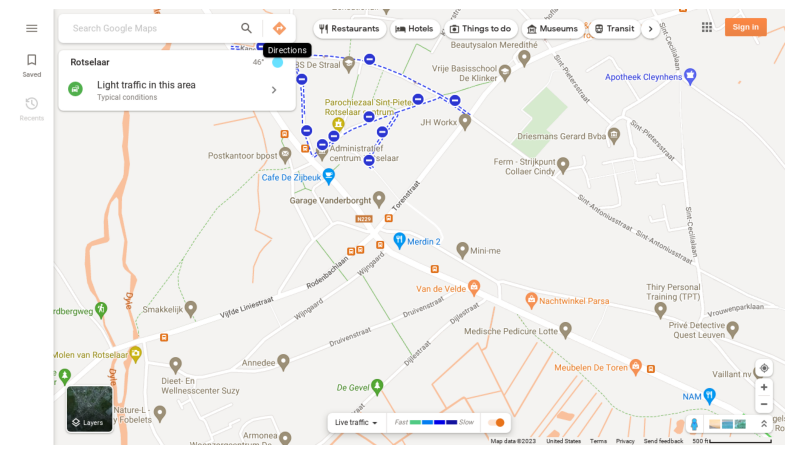

In [44]:
fig, ax = subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(imb);

In [74]:
# diff = cv2.subtract(imb, im)
diff = cv2.absdiff(imb, im)

In [75]:
diff.shape

(720, 1280, 3)

In [82]:
gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
gray_diff.shape

(720, 1280)

In [83]:
gray_diff.max()

222

In [84]:
(thresh, mask_img) = cv2.threshold(gray_diff, 1, 255, cv2.THRESH_BINARY)

In [88]:
mask_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [93]:
rgb_diff_mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2RGB)

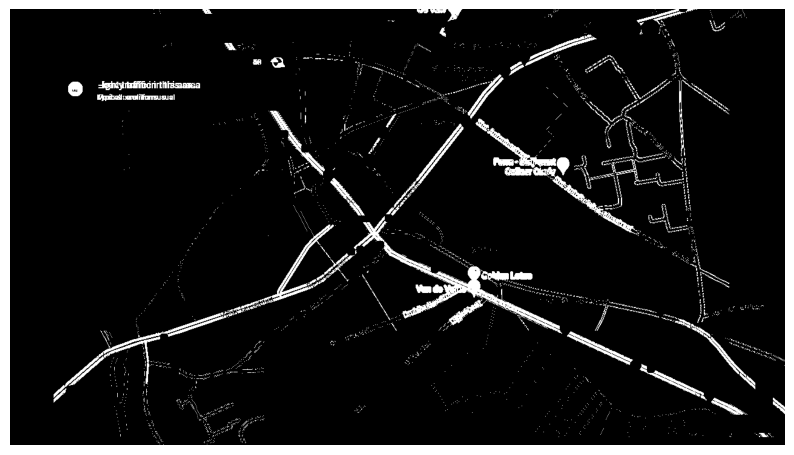

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()
plt.imshow(rgb_diff_mask);

In [66]:
# Split the difference image into its color channels
b, g, r = cv2.split(diff)

# Combine the color channels into a single image
zeros = np.zeros(gray_diff.shape[:2], dtype=np.uint8)
diff_image = cv2.merge((gray_diff > 0, zeros, zeros))

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'merge'
> Overload resolution failed:
>  - Can't parse 'mv'. Sequence item with index 0 has a wrong type
>  - Can't parse 'mv'. Sequence item with index 0 has a wrong type


In [34]:
ret, mask = cv2.threshold(diff_image, 1, 1,cv2.THRESH_BINARY_INV)

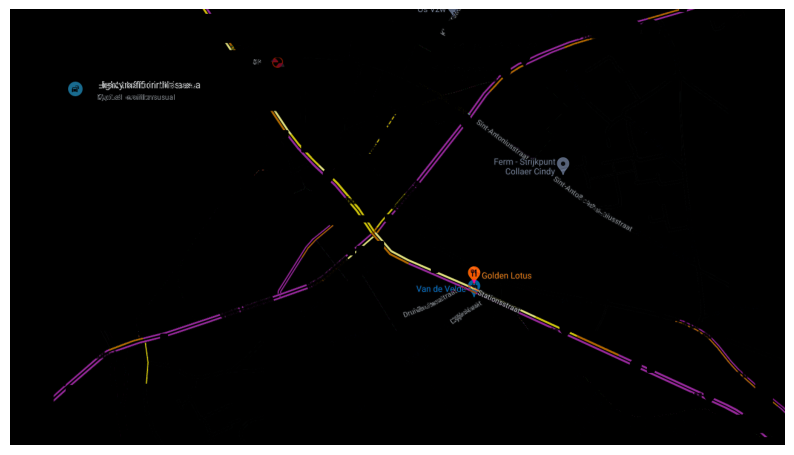

In [47]:
fig, ax = subplots(figsize=(10, 10))
ax.set_axis_off()
imshow(diff);

In [48]:
Conv_hsv_Gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

In [49]:
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

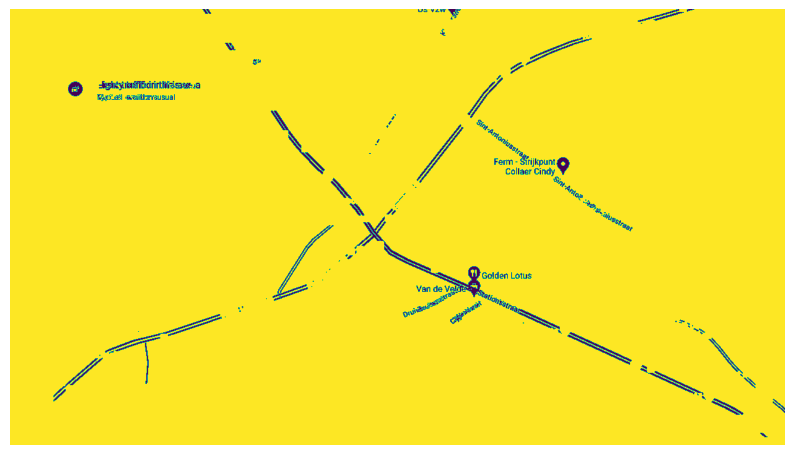

In [50]:
fig, ax = subplots(figsize=(10, 10))
ax.set_axis_off()
imshow(mask);